<a href="https://colab.research.google.com/github/ingrafaeln/Ciencia-de-Datos/blob/main/Seccion_3/Ejemplo_2_1_performance_metrics_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas de Clasificación

En este notebook, exploraremos el uso de métricas de clasificación en dos escenarios diferentes: uno con un **dataset balanceado** y otro con un dataset desbalanceado. A través de estos ejemplos, se ilustrará cómo las métricas comunes de clasificación pueden ayudar a evaluar el rendimiento de modelos en diferentes contextos.

El objetivo principal es proporcionar una comprensión clara de cómo interpretar estas métricas, destacando la importancia de elegir las métricas adecuadas según la naturaleza del problema y la distribución de las clases. Se presentarán las siguientes métricas:

- Matriz de Confusión
- Precisión (Accuracy)
- Precisión (Precision)
- Recall
- F1-Score

Además, analizaremos cómo los modelos de clasificación pueden comportarse de manera diferente dependiendo de si los datos están balanceados o desbalanceados, y cómo estas métricas pueden revelar aspectos importantes del rendimiento del modelo que no siempre son evidentes con una sola métrica. Al final de este notebook, se espera que puedas interpretar y aplicar correctamente estas métricas para tomar decisiones informadas sobre la calidad de un modelo de clasificación.

**Nota**: Este notebook se enfocará en el dataset balanceado.

In [1]:
# Esta celda es una práctica estándar para la configuración del entorno.
# Su objetivo es detectar si el notebook se está ejecutando en el entorno de nube
# de Google Colab o en un entorno local (como Jupyter en una máquina personal).
# Esto permite que el script ajuste automáticamente las rutas de los archivos
# y los comandos de instalación (como !wget) según sea necesario.

# verificar si estamos en google colab
try:
    # Inicia un bloque 'try' para intentar ejecutar un código que podría fallar.
    import google.colab

    # Si la importación tiene éxito, significa que estamos en Google Colab.
    # Se crea una variable booleana 'IN_COLAB' y se establece en True.
    IN_COLAB = True

except:
    # Si el bloque 'try' falla (genera un ImportError), significa que el módulo
    # 'google.colab' no existe y, por lo tanto, no estamos en Colab.
    # La variable 'IN_COLAB' se establece en False.
    IN_COLAB = False

In [2]:
# Importación de bibliotecas estándar.
# El módulo 'os' (Operating System) proporciona funciones para interactuar
# con el sistema operativo, como crear, leer o verificar rutas de archivos.
# Es esencial para que el notebook sea "agnóstico" al sistema operativo
# (es decir, funcione en Windows, macOS o Linux).

# Importa el módulo 'os'
import os

In [3]:
# --- Explicación Académica ---
# Esta celda gestiona la adquisición de datos y scripts externos, un paso
# crucial en entornos de nube como Colab, que son efímeros (los archivos se
# borran al reiniciar la sesión).

# Primero, comprueba la variable 'IN_COLAB' definida previamente.
if IN_COLAB:

    # Comprueba si la carpeta de destino 'datasets_github' NO existe.
    # Esto evita descargar los archivos repetidamente si la celda se ejecuta
    # varias veces en la misma sesión.
    if not os.path.exists('datasets_github'):

        # El comando '!' ejecuta un comando de shell (Linux) desde Python.
        # 'wget' descarga un archivo.
        # '-q' (quiet) lo hace en modo silencioso.
        # '-O repositorio.zip' especifica el nombre del archivo de salida.
        !wget -q -O repositorio.zip https://github.com/DiegoPaezA/CienciaDatos-MASDI/archive/refs/heads/main.zip

        # Descomprime el archivo 'repositorio.zip' silenciosamente ('-q').
        !unzip -q repositorio.zip

        # 'mv' (move) renombra y mueve la carpeta de datos necesaria
        # desde la estructura descomprimida a una nueva carpeta 'datasets_github'.
        !mv CienciaDatos-MASDI-main/Seccion_3/dataset_sintetico datasets_github

        # Mueve el script de Python 'datasetanalyser.py' a la raíz del proyecto.
        !mv CienciaDatos-MASDI-main/Seccion_3/datasetanalyser.py datasetanalyser.py

        # 'rm -rf' (remove) elimina recursivamente y sin confirmación
        # los archivos y carpetas temporales que ya no se necesitan.
        !rm -rf repositorio.zip CienciaDatos-MASDI-main

        print("Archivos descargados y extraídos correctamente.")
    else:
        # Si la carpeta ya existía, informa al usuario.
        print("Archivos ya descargados y extraídos.")

Archivos ya descargados y extraídos.


In [4]:
dataset_sintetico_path = os.path.join(os.getcwd(), 'dataset_sintetico')

# 1. Análisis de los Datos

## 1.1. Cargar los Datos

Una empresa está lanzando un nuevo producto y quiere segmentar a los clientes en función de su nivel de interés. Para maximizar el impacto de la campaña, el equipo de marketing desea clasificar a los clientes en tres grupos:

- No Interesado: Clientes que probablemente no comprarán el producto.
- Interesado Moderado: Clientes que podrían estar interesados, pero aún necesitan más información o incentivos para comprar.
- Muy Interesado: Clientes que muestran un alto interés y tienen una gran probabilidad de comprar el producto.

- Variable Objetivo
  - Nivel_Interes:
  - Tipo: Categórica (0, 1, 2)
  - Descripción: Variable objetivo que indica el nivel de interés del cliente:
    - 0 = No Interesado
    - 1 = Interesado Moderado
    - 2 = Muy Interesado

In [5]:


# Importamos la biblioteca pandas
import pandas as pd
# definimos la ruta del dataset a cargar
datasets_folder_name = '/content/datasets_github' if IN_COLAB else dataset_sintetico_path
ruta_dataset = os.path.join(datasets_folder_name, 'dataset_1_clientes_nivel_interes_sintetico.csv')
# Cargamos el dataset
df1_clientes = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas del dataset
df1_clientes.head()



,Edad,Ingreso_Anual,Gasto_Promedio,Productos_Anteriores,Puntuacion_Interes,Nivel_Interes
0,47,76330,1548,1,0.00,0
1,31,21816,983,0,0.75,1
2,43,52957,607,2,0.00,0
3,22,36022,598,0,0.06,2
4,37,32713,100,0,0.00,1


## 1.2. Explorar los Datos

Realiza un análisis exploratorio inicial para entender la estructura y el contenido del dataset. Esto incluye revisar el tipo de datos, el número de entradas, y estadísticas básicas para cada variable.

### Paso 1.3: Comprobar Datos Faltantes o Anómalos
Verifica si hay valores faltantes y observa si hay valores fuera de los rangos esperados. Esto ayudará a identificar datos que necesiten limpieza o ajustes.

### Paso 1.4: Análisis Univariado
Examina cada característica por separado para entender su distribución. Utiliza histogramas y diagramas de caja para visualizar la variabilidad de cada característica.

### Paso 1.5: Análisis Bivariado
Examina cómo se relacionan las características con la variable objetivo `Nivel_Interes`. Utiliza diagramas de dispersión y gráficos de violín para visualizar relaciones y patrones entre variables.

### Paso 1.6: Análisis de Correlación
Verifica las correlaciones entre las características para identificar posibles relaciones que puedan ser importantes en el análisis. Esto puede ayudar a reducir la multicolinealidad y seleccionar las características más relevantes.

### Paso 1.7: Conclusiones Iniciales del Análisis
Resume los hallazgos clave de la exploración de los datos. Identifica características que distingan claramente los diferentes niveles de interés y patrones generales que podrías aprovechar en el modelado predictivo.

### Paso 1.8: Visualizaciones Adicionales para Insights
Crea visualizaciones adicionales si observaste patrones interesantes que merecen ser destacados. Estas visualizaciones pueden ayudar a comunicar mejor los resultados del análisis y proporcionar insights más profundos.

In [6]:
# Perfilamiento de Datos (Data Profiling).
# Este paso utiliza dos métodos esenciales de Pandas para obtener una
# visión general rápida de la estructura, calidad y distribución
# estadística del conjunto de datos.

## 1.2. Exploración de los datos

# Información general del dataset
# .info() proporciona un resumen técnico: número de filas (entradas),
# columnas, tipos de datos (Dtype) de cada columna y conteo de valores no nulos.
# Es el método principal para detectar valores faltantes (missing values).
df1_clientes.info()

# Resumen estadístico de las variables numéricas
# .describe() calcula estadísticas descriptivas clave (conteo, media,
# desviación estándar, mínimo, máximo y los cuartiles) para todas las
# columnas numéricas. Es vital para entender el rango y la escala de
# las características.
df1_clientes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  1500 non-null   int64  
 1   Ingreso_Anual         1500 non-null   int64  
 2   Gasto_Promedio        1500 non-null   int64  
 3   Productos_Anteriores  1500 non-null   int64  
 4   Puntuacion_Interes    1500 non-null   float64
 5   Nivel_Interes         1500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 70.4 KB


,Edad,Ingreso_Anual,Gasto_Promedio,Productos_Anteriores,Puntuacion_Interes,Nivel_Interes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,34.328667,45825.488667,1025.471333,0.752000,0.294913,1.001333
std,9.608652,19767.253997,627.561362,0.841607,0.381295,0.811852
min,18.000000,20000.000000,100.000000,0.000000,0.000000,0.000000
25%,28.000000,29547.250000,460.500000,0.000000,0.000000,0.000000
50%,34.000000,43045.000000,1064.500000,1.000000,0.040000,1.000000
75%,41.000000,58969.000000,1507.250000,1.000000,0.592500,2.000000
max,67.000000,107465.000000,3244.000000,5.000000,1.000000,2.000000


**Conclusión**

- Se observa que todos los datos son numéricos y no hay valores faltantes en el dataset.
- Las variables se encuentran en diferentes rangos, por lo que normalizarlas puede ser útil para el modelado.
- Existen 5 variables predictoras y una variable objetivo con 3 clases.

## 1.3: Comprobar Datos Faltantes o Anómalos
Verifica si hay valores faltantes y observa si hay valores fuera de los rangos esperados. Esto ayudará a identificar datos que necesiten limpieza o ajustes.


In [7]:
# Importación de Módulo Personalizado.
# Siguiendo los principios de código modular (Programación Orientada a Objetos),
# las funciones de análisis reutilizables se han encapsulado en una clase
# externa, 'DatasetAnalyzer', que ahora se importa al notebook.

# Desde el archivo 'datasetanalyser.py' (que movimos en la Celda 5),
# importa la clase específica 'DatasetAnalyzer'.
from datasetanalyser import DatasetAnalyzer

In [8]:
# Instanciación de Clase.
# Se crea un objeto 'analyzer' a partir de la "plantilla" de la clase
# 'DatasetAnalyzer'. Este objeto contendrá los datos y los métodos
# (funciones) definidos en la clase para operar sobre esos datos.

# Llama al constructor de la clase (el método __init__) y le pasa
# el DataFrame 'df1_clientes' como argumento.
analyzer = DatasetAnalyzer(df1_clientes)

In [9]:
# Validación de Calidad de Datos.
# Se ejecuta el método de la clase diseñado para verificar dos problemas
# comunes de calidad de datos: valores nulos (faltantes) y anomalías
# (como valores negativos en campos donde no tienen sentido, ej. Ingreso).

# Llama al método 'check_missing_and_anomalies' del objeto 'analyzer'.
analyzer.check_missing_and_anomalies()

Valores faltantes por columna:
Edad                    0
Ingreso_Anual           0
Gasto_Promedio          0
Productos_Anteriores    0
Puntuacion_Interes      0
Nivel_Interes           0
dtype: int64

Valores negativos detectados en columnas numéricas:


No se encontraron valores faltantes en el dataset, lo que es un buen indicador de la calidad de los datos.

## 1.4: Análisis Univariado

Examina cada característica por separado para entender su distribución. Utiliza histogramas y diagramas de caja para visualizar la variabilidad de cada característica.

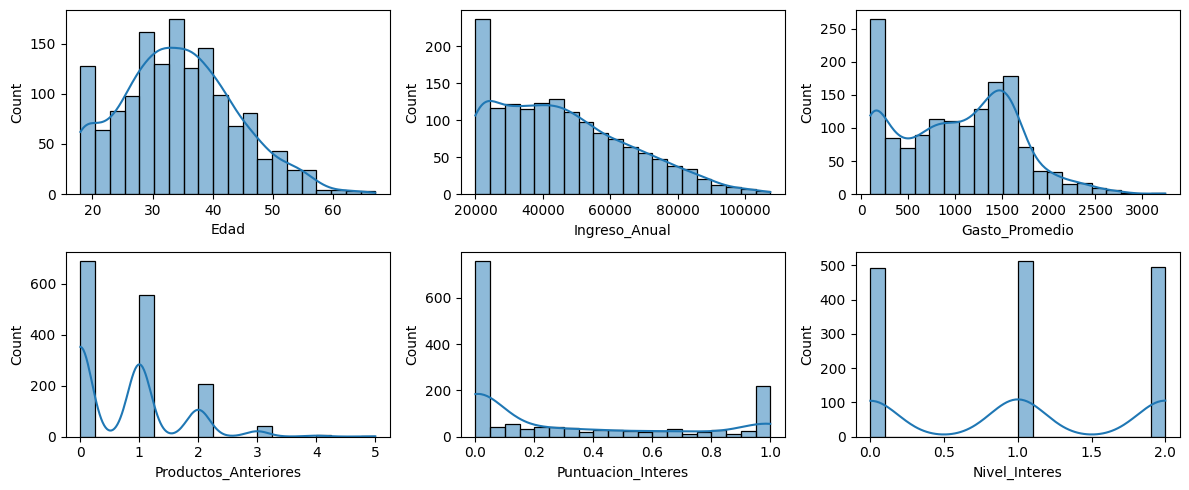

In [10]:
# Análisis Univariado - Visualización de Distribución.
# Se utiliza el método de la clase para generar histogramas. Los histogramas
# son fundamentales para entender la forma de la distribución de cada
# variable: su tendencia central (media, mediana), dispersión (std),
# asimetría (sesgo) y modalidad (número de picos).

# Llama al método 'univariate_analysis' del objeto 'analyzer'.
# 'plot_type='histogram'' es el argumento que le indica al método
# qué tipo de gráfico generar.
# 'fig_size=(12, 5)' ajusta el tamaño de la figura para mejorar la legibilidad.
analyzer.univariate_analysis(plot_type='histogram', fig_size=(12, 5))

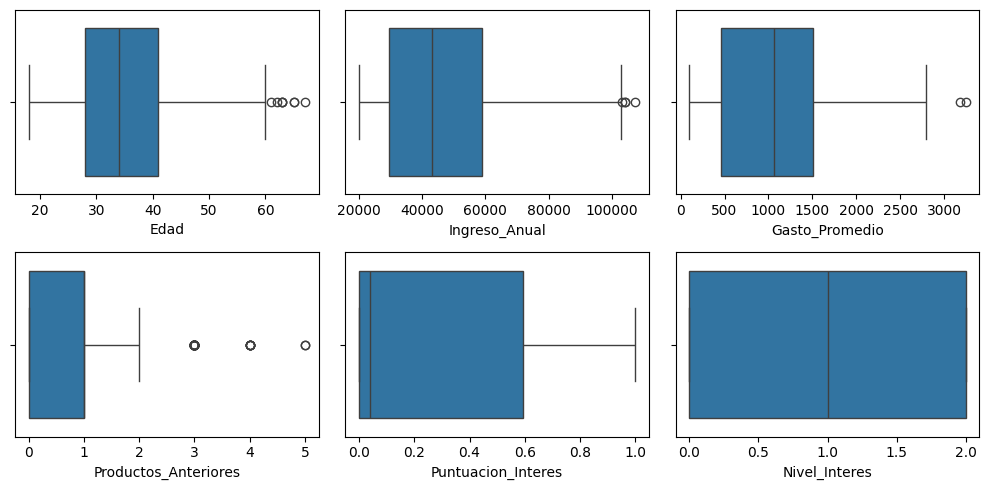

In [11]:
# Análisis Univariado - Visualización de Outliers y Cuartiles.
# Se utiliza el mismo método, pero ahora se generan diagramas de caja (boxplots).
# Los boxplots son excelentes para identificar rápidamente la mediana (línea central),
# el rango intercuartílico (IQR, la caja), el rango de los datos (bigotes)
# y los valores atípicos (outliers), que son cruciales para las decisiones
# de preprocesamiento.

# Llama al método 'univariate_analysis' del objeto 'analyzer'.
# 'plot_type='boxplot'' especifica el tipo de gráfico.
analyzer.univariate_analysis(plot_type='boxplot', fig_size=(10, 5))

**Conclusiones del Análisis Univariado**

1. Edad
- **Histograma**: La mayoría de los clientes tienen edades entre **30 y 40 años**, con una distribución que disminuye a medida que la edad aumenta.
- **Boxplot**: No se observan valores atípicos significativos; la distribución de la edad es estable dentro de un rango esperado.

2. Ingreso Anual
- **Histograma**: La distribución está **sesgada a la derecha**, con muchos clientes en el rango de **20,000 a 40,000** dólares y menos clientes con ingresos altos.
- **Boxplot**: Se identifican **valores atípicos** para ingresos superiores a **80,000 dólares**, sugiriendo la presencia de algunos clientes con ingresos significativamente más altos que el promedio.

3. Gasto Promedio
- **Histograma**: La distribución es **multimodal**, con picos en diferentes niveles de gasto, lo que indica que hay grupos distintos de comportamiento de gasto.
- **Boxplot**: Existen **valores atípicos** hacia el extremo superior, lo que sugiere que algunos clientes tienen un gasto promedio mucho más alto que la mayoría.

4. Productos Anteriores
- **Histograma**: La mayoría de los clientes compraron entre **0 y 2 productos** anteriormente, con un pico notable en **1 producto**.
- **Boxplot**: Los valores de **4 y 5 productos** aparecen como **valores atípicos**, indicando que son clientes con un historial de compras más extenso, aunque no es común.

5. Puntuación de Interés
- **Histograma**: Hay dos concentraciones principales: una en el rango **0-0.2** (bajo interés) y otra alrededor de **1.0** (alto interés), indicando que los clientes suelen estar muy interesados o poco interesados, con pocos en el medio.
- **Boxplot**: No hay valores atípicos destacados, pero la distribución muestra dos grupos claramente diferenciados de clientes con niveles de interés opuestos.

6. Nivel de Interés
- **Histograma**: La variable muestra **tres picos definidos**, sugiriendo que los clientes se agrupan en tres niveles de interés bien diferenciados.
- **Boxplot**: La distribución es uniforme entre las tres categorías de interés sin valores atípicos, lo que confirma que los niveles están claramente segmentados.


**Conclusiones Generales del Análisis Univariado**

- Distribuciones Asimétricas: Tanto el ingreso anual como el gasto promedio muestran distribuciones asimétricas, indicando que hay una minoría que gana y gasta mucho más que el promedio.
- Presencia de Valores Atípicos: Hay valores atípicos significativos en el ingreso anual, gasto promedio y productos anteriores. Estos valores extremos pueden ser clientes especiales (como clientes VIP o de alta lealtad) que podrían necesitar un análisis separado.
- Agrupaciones Claras: La puntuación de interés y el nivel de interés muestran agrupaciones bien definidas, lo que podría indicar que los clientes se clasifican claramente en niveles específicos de interés. Esto puede ser útil para segmentar y diseñar estrategias de marketing dirigidas.
- Variedad de Comportamientos: El gasto promedio tiene una distribución multimodal, lo que sugiere que existen varios grupos de comportamiento de clientes con diferentes hábitos de gasto.

## 1.5: Análisis Bivariado
Examina cómo se relacionan las características con la variable objetivo `Nivel_Interes`. Utiliza diagramas de dispersión y gráficos de violín para visualizar relaciones y patrones entre variables.

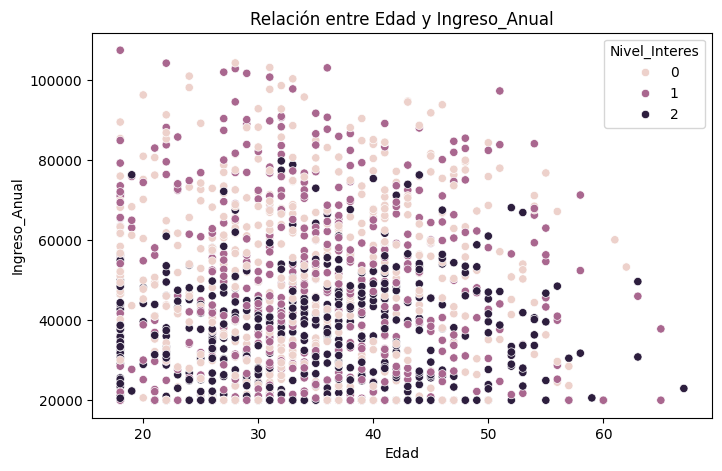

In [12]:
# Análisis Bivariado (Característica vs. Característica por Objetivo).
# Se utiliza un gráfico de dispersión (scatter plot) para visualizar la
# relación entre dos variables numéricas ('Edad' e 'Ingreso_Anual').
# El argumento 'hue' (matiz) es clave, ya que colorea cada punto según su
# clase objetivo, permitiéndonos buscar patrones o cúmulos (clusters)
# específicos de cada clase.

analyzer.bivariate_analysis("Edad",          # Variable para el eje X
                            "Ingreso_Anual", # Variable para el eje Y
                            hue="Nivel_Interes", # Columna para colorear los puntos
                            plot_type='scatter') # Tipo de gráfico

### Análisis Bivariado: Edad vs. Ingreso Anual (por Nivel de Interés)

Este gráfico de dispersión (scatter plot) nos permite examinar la interacción entre tres variables simultáneamente:

* **Eje X:** `Edad`
* **Eje Y:** `Ingreso_Anual`
* **Color (Hue):** `Nivel_Interes` (0: No Interesado, 1: Interesado Moderado, 2: Muy Interesado)

**Interpretación y Conclusiones:**

1.  **Relación entre Edad e Ingreso Anual:**
    * No se observa una **correlación lineal** clara entre la `Edad` y el `Ingreso_Anual`. Los puntos de datos están ampliamente dispersos, formando una "nube" en lugar de una línea o curva definida.
    * Esto indica que, en este dataset, el ingreso de una persona no parece depender fuertemente de su edad. Hay clientes jóvenes con ingresos altos y clientes mayores con ingresos bajos (y viceversa).

2.  **Separabilidad de Clases (Nivel de Interés):**
    * El hallazgo más importante de este gráfico es la **alta superposición de las clases**. Los puntos de diferentes colores (`Nivel_Interes` 0, 1 y 2) están muy mezclados en todo el gráfico.
    * No existen "cúmulos" o "clusters" definidos donde predomine un solo color. Por ejemplo, en el rango de 30-40 años y 40k-60k de ingreso, encontramos instancias de las tres categorías de interés.

**Conclusión:**
Este análisis es crucial para la etapa de modelado. Demuestra que si intentáramos construir un modelo de clasificación usando *únicamente* las características `Edad` e `Ingreso_Anual`, el modelo tendría un rendimiento muy bajo. La falta de separabilidad visual sugiere que estas dos características, por sí solas, no tienen suficiente poder predictivo para distinguir entre los tres niveles de interés.

Por lo tanto, el éxito del modelo dependerá de la inclusión de otras características (como `Gasto_Promedio` o `Puntuacion_Interes`) que sí aporten información distintiva, tal como se exploró en los análisis de densidad y correlación.

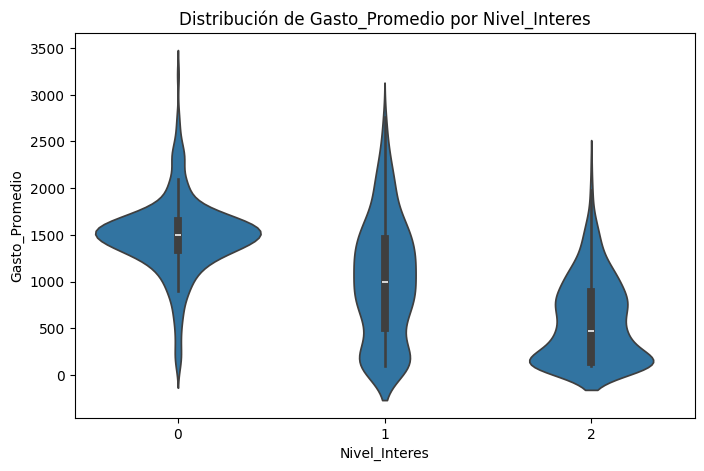

In [13]:
# Análisis Bivariado (Característica Numérica vs. Objetivo Categórico).
# Se utiliza un gráfico de violín (violin plot) para comparar la distribución
# de una variable numérica ('Gasto_Promedio') entre las diferentes categorías
# de la variable objetivo ('Nivel_Interes'). Este gráfico combina un boxplot
# (que muestra los cuartiles) con un gráfico de densidad (KDE), lo que
# revela la forma de la distribución en cada categoría.

analyzer.bivariate_analysis("Nivel_Interes",    # Variable categórica para el eje X
                            "Gasto_Promedio", # Variable numérica para el eje Y
                            plot_type='violin') # Tipo de gráfico

### Análisis Bivariado: Gasto Promedio vs. Nivel de Interés

Este **gráfico de violín** es una herramienta de visualización poderosa que combina un diagrama de caja (boxplot) con un gráfico de densidad (KDE) para mostrar la distribución de una variable numérica (`Gasto_Promedio`) en diferentes categorías de una variable categórica (`Nivel_Interes`).

**Interpretación y Conclusiones:**

1.  **Comparación de Distribuciones:**
    * El gráfico muestra tres "violines", uno para cada categoría de `Nivel_Interes`. La forma (anchura) del violín en un punto Y determinado indica la densidad o frecuencia de clientes con ese `Gasto_Promedio` en esa categoría.
    * Se observa una **diferencia visual muy clara** en la forma y posición de las tres distribuciones, lo que sugiere que `Gasto_Promedio` es una característica predictiva importante.

2.  **Análisis por Clase:**
    * **Nivel\_Interes 0 (No Interesado):** Este violín es el más ancho y extendido. Muestra una alta **variabilidad**. La densidad está concentrada en un rango amplio (aprox. 1000 a 1800) y tiene la cola superior más larga, alcanzando valores atípicos de hasta 3500. La mediana (línea blanca en la caja) es la más alta de las tres, situada alrededor de 1500.
    * **Nivel\_Interes 1 (Interesado Moderado):** La distribución es también amplia, pero la densidad principal está más concentrada en el centro, con una mediana más baja que la clase 0 (aprox. 1100).
    * **Nivel\_Interes 2 (Muy Interesado):** Este violín es el más **compacto** y está situado en la parte inferior del eje Y. La densidad está fuertemente concentrada en valores bajos, con una mediana (aprox. 500) y un rango intercuartílico (la caja) significativamente menores que los otros dos grupos.

**Conclusión Académica:**

* Existe una **clara relación negativa** entre el `Gasto_Promedio` y el `Nivel_Interes`. A medida que el interés aumenta (de 0 a 2), la mediana del gasto promedio disminuye.
* La **variabilidad** del gasto también disminuye con el aumento del interés. Los clientes "No Interesados" (0) tienen los patrones de gasto más erráticos y altos, mientras que los "Muy Interesados" (2) son un grupo más homogéneo que gasta menos.
* Este hallazgo visual corrobora la **correlación negativa de -0.59** encontrada en la matriz de correlación. `Gasto_Promedio` es una característica con un **alto poder predictivo** para este problema de clasificación.

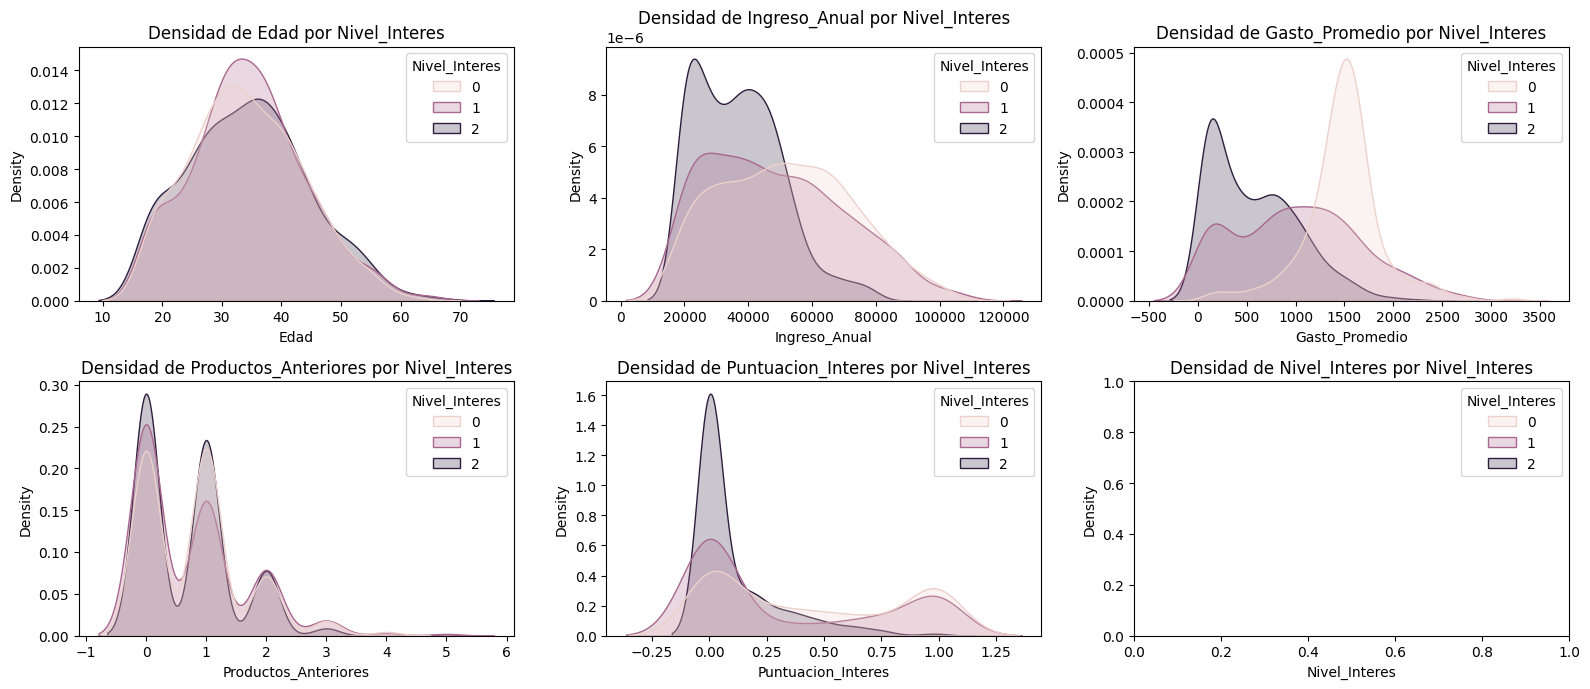

In [14]:
# Análisis Bivariado (Características vs. Objetivo).
# Se utiliza un análisis de densidad (KDE plot) para cada característica,
# segmentado por la variable objetivo. Esto nos permite comparar visualmente
# cómo las distribuciones de cada característica (ej. Ingreso_Anual) cambian
# para la Clase 0, Clase 1 y Clase 2.

analyzer.density_analysis(target_col="Nivel_Interes", # Columna objetivo para segmentar
                          fig_size=(16, 7))       # Tamaño de la figura

**Análisis Bivariado Simplificado**

1. Relación entre Edad e Ingreso Anual
- El **gráfico de dispersión** muestra que no hay una correlación clara entre la edad y el ingreso anual.
- Los clientes se distribuyen de manera uniforme en todos los niveles de edad e ingreso.
- Las categorías de **Nivel_Interes** están representadas por diferentes colores, pero no parece haber una diferenciación clara basada en estos atributos.

2. Distribución de Gasto Promedio por Nivel_Interes
- El **gráfico de violín** revela que los clientes con **Nivel_Interes 0** (más bajo) tienen una mayor variabilidad en el gasto promedio, con algunos que gastan significativamente más.
- Los clientes con **Nivel_Interes 1** y **Nivel_Interes 2** tienden a gastar menos en promedio, y la distribución es más compacta, lo que indica menos variabilidad en su gasto.

3. Densidad de Características por Nivel_Interes
- **Edad**: Las distribuciones de edad son similares entre las tres categorías de **Nivel_Interes**, con picos en edades cercanas a los **30-40 años**.
- **Ingreso Anual**: Los clientes con **Nivel_Interes 0** tienden a tener un rango de ingreso más alto en comparación con los otros niveles de interés.
- **Gasto Promedio**: Se observa que el **Nivel_Interes 0** presenta una mayor densidad en los valores de gasto promedio más altos, lo que refuerza la observación de mayor variabilidad de gasto.
- **Productos Anteriores**: La mayoría de los clientes en todos los niveles han comprado entre **0 y 2 productos** anteriormente, pero el **Nivel_Interes 0** muestra un segundo pico para clientes que compraron más productos.
- **Puntuación de Interés**: Los clientes con **Nivel_Interes 2** tienen una mayor densidad en puntuaciones más altas, sugiriendo una mayor coherencia en su nivel de interés.

**Conclusiones Generales**
- Los clientes con **Nivel_Interes 0** muestran mayor variabilidad en sus patrones de compra, especialmente en el **gasto promedio** y el **número de productos comprados**.
- No hay una correlación clara entre la **edad** y el **ingreso** que diferencie las categorías de interés.
- Las **distribuciones de densidad** ayudan a identificar patrones clave: el **Ingreso Anual** y el **Gasto Promedio** parecen ser los atributos que más diferencias muestran entre los niveles de interés.


### Análisis de Densidad (KDE) por Nivel de Interés

Estos gráficos de densidad (Kernel Density Estimate o KDE) son fundamentales en el análisis bivariado. Nos permiten comparar visualmente la distribución de probabilidad de cada característica numérica, segmentada por las tres clases de `Nivel_Interes`. Una buena característica predictora mostrará curvas de densidad que están claramente separadas para cada clase.

**Interpretación y Conclusiones:**

1.  **Densidad de Edad:**
    * Las tres curvas (para las clases 0, 1 y 2) están **altamente superpuestas**.
    * Todas las clases tienen una distribución de edad similar, con una concentración de clientes entre los 25 y 45 años.
    * **Conclusión:** La `Edad` no parece ser un buen predictor, ya que no permite distinguir claramente entre los diferentes niveles de interés.

2.  **Densidad de Ingreso\_Anual:**
    * Aquí se observa una **separación clara**.
    * **Clase 0 (No Interesado):** La curva (rosa pálido) está sesgada hacia la derecha, con una cola larga que indica la presencia de clientes con ingresos muy altos (superiores a 80,000).
    * **Clase 1 (Interesado Moderado):** La curva (morado) tiene su pico en un nivel de ingresos más bajo, centrado alrededor de 30,000.
    * **Clase 2 (Muy Interesado):** La curva (morado oscuro) tiene su pico en un nivel de ingresos similar o ligeramente inferior al de la Clase 1.
    * **Conclusión:** El `Ingreso_Anual` es una característica predictiva útil. Los ingresos más altos están fuertemente asociados con la Clase 0.

3.  **Densidad de Gasto\_Promedio:**
    * Esta característica muestra una **excelente separabilidad** entre las clases.
    * **Clase 0 (No Interesado):** Tiene el pico de densidad en el valor de gasto más alto (aprox. 1500) y la distribución más amplia.
    * **Clase 1 (Interesado Moderado):** Tiene su pico en un gasto intermedio (aprox. 1100).
    * **Clase 2 (Muy Interesado):** Tiene un pico muy definido en un gasto bajo (aprox. 500).
    * **Conclusión:** `Gasto_Promedio` es un predictor muy fuerte. Existe una clara relación inversa: a mayor interés, menor es el gasto promedio.

4.  **Densidad de Productos\_Anteriores:**
    * Las distribuciones son **multimodales** (con picos en 0, 1 y 2 productos) y están **muy superpuestas**.
    * La Clase 2 (Muy Interesado) tiene su pico más alto en 0 productos, mientras que las Clases 0 y 1 tienen sus picos más altos en 1 producto.
    * **Conclusión:** Aunque hay ligeras diferencias, la superposición es considerable, lo que la convierte en una característica predictiva más débil que el ingreso o el gasto.

5.  **Densidad de Puntuacion\_Interes:**
    * Esta es la característica con la **mejor separabilidad** de todas.
    * **Clase 0 (No Interesado):** Tiene un pico extremadamente agudo en 0.0.
    * **Clase 2 (Muy Interesado):** Tiene un pico igualmente agudo cerca de 1.0.
    * **Clase 1 (Interesado Moderado):** Es bimodal, con un pico más pequeño en 0.0 y un pico más amplio cerca de 0.8, representando perfectamente su naturaleza "moderada" o intermedia.
    * **Conclusión:** `Puntuacion_Interes` es el predictor más fuerte para este problema.

**Conclusión General del Análisis Bivariado:**
El análisis de densidad revela que `Puntuacion_Interes` y `Gasto_Promedio` son las características más importantes para diferenciar las clases. `Ingreso_Anual` también proporciona información útil. Por el contrario, `Edad` y `Productos_Anteriores` muestran una alta superposición entre clases, sugiriendo que tienen un poder predictivo limitado.

## 1.6: Análisis de Correlación
Verifica las correlaciones entre las características para identificar posibles relaciones que puedan ser importantes en el análisis. Esto puede ayudar a reducir la multicolinealidad y seleccionar las características más relevantes.

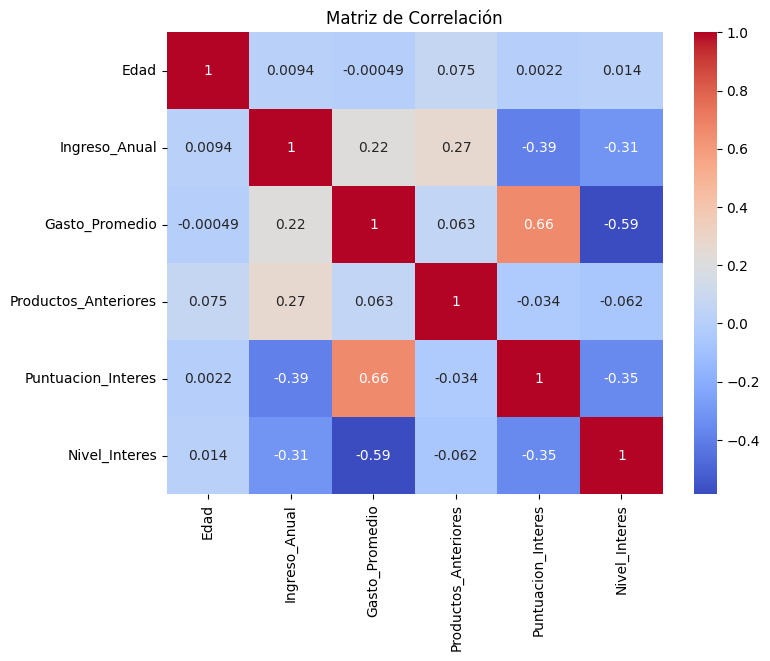

In [15]:
# Análisis de Correlación (Heatmap).
# Se calcula la matriz de correlación (generalmente de Pearson) para
# cuantificar la relación lineal entre pares de variables numéricas.
# Se visualiza como un mapa de calor (heatmap) para identificar rápidamente
# correlaciones fuertes (positivas o negativas), que son clave para la
# selección de características y para detectar multicolinealidad.

analyzer.correlation_analysis(fig_size=(8, 6))

**Análisis de la Matriz de Correlación**

La **matriz de correlación** muestra las relaciones lineales entre las diferentes características del dataset. Aquí se destacan las correlaciones significativas que pueden ser útiles para interpretar patrones en los datos:

1. Gasto Promedio y Puntuación de Interés
- **Correlación: 0.66** (positiva)
- Existe una correlación moderada-alta entre el **Gasto Promedio** y la **Puntuación de Interés**, lo que sugiere que a medida que aumenta la puntuación de interés, los clientes tienden a gastar más. Esto indica que el nivel de interés podría ser un buen indicador para predecir el gasto.

1. Gasto Promedio y Nivel_Interes
- **Correlación: -0.59** (negativa)
- Hay una correlación moderada-negativa entre el **Gasto Promedio** y el **Nivel_Interes**, lo que sugiere que a medida que aumenta el nivel de interés, el gasto promedio disminuye. Esto podría indicar diferencias en los comportamientos de compra entre los diferentes niveles de interés.

1. Ingreso Anual y Puntuación de Interés
- **Correlación: -0.39** (negativa)
- Existe una correlación negativa entre el **Ingreso Anual** y la **Puntuación de Interés**, lo que sugiere que los clientes con ingresos más altos tienden a tener una menor puntuación de interés. Esto puede indicar que la puntuación de interés no está directamente relacionada con el poder adquisitivo.

1. Ingreso Anual y Nivel_Interes
- **Correlación: -0.31** (negativa)
- Hay una correlación negativa entre el **Ingreso Anual** y el **Nivel_Interes**, lo que sugiere que a medida que aumenta el nivel de interés, el ingreso anual tiende a disminuir. Esto refuerza la observación anterior de que el nivel de interés no necesariamente se asocia con clientes de ingresos más altos.

1. Productos Anteriores e Ingreso Anual
- **Correlación: 0.27** (positiva)
- Se observa una correlación positiva entre el **número de Productos Anteriores** y el **Ingreso Anual**, lo que indica que los clientes que han comprado más productos en el pasado tienden a tener mayores ingresos.

1. Otras Observaciones
- **Edad** no presenta correlaciones significativas con ninguna otra variable, lo que sugiere que no tiene un impacto directo en el comportamiento de gasto, ingreso, o nivel de interés.
- **Productos Anteriores** muestra correlaciones bajas con otras variables, lo que indica que es un atributo independiente con poca influencia sobre las demás características.

**Conclusión General**
- El **Gasto Promedio** y la **Puntuación de Interés** parecen ser los atributos más interrelacionados, sugiriendo que el comportamiento de gasto está alineado con el interés del cliente.
- Las **correlaciones negativas** de **Ingreso Anual** con **Puntuación de Interés** y **Nivel_Interes** indican que hay diferencias en los patrones de comportamiento que pueden requerir un análisis adicional.
- Los resultados sugieren que ciertos atributos, como **Gasto Promedio** y **Puntuación de Interés**, podrían ser claves para entender y predecir el comportamiento del cliente, mientras que otros, como **Edad**, muestran menor relevancia en las correlaciones.


## 1.7: Conclusiones del Análisis

1. **Distribuciones Asimétricas**: Las variables de ingreso anual y gasto promedio muestran distribuciones asimétricas, lo que indica que hay una minoría de clientes con ingresos y gastos significativamente más altos que el promedio.
2. **Valores Atípicos**: Se identificaron valores atípicos en el ingreso anual, gasto promedio y productos anteriores, lo que sugiere la presencia de clientes especiales que podrían requerir un análisis más detallado.
3. **Agrupaciones Claras**: La puntuación de interés y el nivel de interés muestran agrupaciones bien definidas, lo que podría ser útil para segmentar a los clientes y diseñar estrategias de marketing específicas.
4. **Variedad de Comportamientos**: El gasto promedio tiene una distribución multimodal, lo que sugiere que existen diferentes grupos de comportamiento de clientes con hábitos de gasto distintos.
5. **Correlaciones Clave**: Se identificaron correlaciones significativas entre el gasto promedio, la puntuación de interés y el nivel de interés, lo que sugiere que estos atributos podrían ser importantes para predecir el comportamiento del cliente.
6. **Relevancia de las Variables**: Algunas variables, como la edad, mostraron correlaciones bajas con otras características, lo que sugiere que su impacto en el comportamiento del cliente es limitado.

# 2. Preparación de los Datos

Antes de construir y evaluar modelos de clasificación, es importante preparar los datos para el análisis. Esto incluye la normalización de las características, la codificación de variables categóricas y la división del dataset en conjuntos de entrenamiento y prueba.

- Normalización de Características
- Remoción de Variables Redundantes
- División del Dataset

## 2.1: Normalización de Características

Dado que las características del dataset tienen diferentes escalas y rangos, es útil normalizarlas para que tengan una distribución más uniforme. Esto puede mejorar el rendimiento de los modelos de clasificación y facilitar la interpretación de los coeficientes.

In [16]:
# Preprocesamiento: Escalado de Características (Normalización Min-Max).
# Este paso crucial transforma las características numéricas para que
# todas se encuentren en un rango común (típicamente [0, 1]).
# Esto es vital para algoritmos sensibles a la escala (aunque Random Forest
# no lo es tanto, es una buena práctica).

# Importa la clase MinMaxScaler de scikit-learn.
from sklearn.preprocessing import MinMaxScaler

# Crea una instancia del escalador.
scaler = MinMaxScaler()

# Crea una copia del DataFrame original para no modificarlo.
df1_clientes_scaled = df1_clientes.copy()

# Selecciona las columnas a escalar.
cols_to_scale = ["Edad", "Ingreso_Anual", "Gasto_Promedio"]

# Aplica el escalado.
# 1. scaler.fit_transform() calcula el min/max de las columnas (fit)
#    y luego aplica la transformación (transform).
# 2. Los valores escalados reemplazan a los originales en el nuevo DataFrame.
df1_clientes_scaled[cols_to_scale] = scaler.fit_transform(df1_clientes[cols_to_scale])

# Muestra el resumen estadístico del DataFrame escalado.
# Se puede observar que las columnas escaladas ahora tienen min=0 y max=1.
df1_clientes_scaled.describe()

,Edad,Ingreso_Anual,Gasto_Promedio,Productos_Anteriores,Puntuacion_Interes,Nivel_Interes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.333238,0.295267,0.294361,0.752000,0.294913,1.001333
std,0.196095,0.226002,0.199606,0.841607,0.381295,0.811852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.204082,0.109155,0.114663,0.000000,0.000000,0.000000
50%,0.326531,0.263477,0.306775,1.000000,0.040000,1.000000
75%,0.469388,0.445538,0.447599,1.000000,0.592500,2.000000
max,1.000000,1.000000,1.000000,5.000000,1.000000,2.000000


## 2.2: Remoción de Variables Redundantes

Para evitar la multicolinealidad y reducir la complejidad del modelo, es útil eliminar variables redundantes o altamente correlacionadas. En este caso, se eliminará la variable `Edad` y `Productos_Anteriores` debido a su baja correlación con las demás características.

In [17]:
# Preprocesamiento: Selección de Características (Feature Selection).
# Basado en las conclusiones del EDA (baja correlación), se eliminan
# las columnas 'Edad' y 'Productos_Anteriores' para simplificar el modelo,
# reduciendo el riesgo de ruido y mejorando potencialmente la eficiencia.

# Utiliza el método .drop() de Pandas para eliminar las columnas especificadas.
# 'inplace=True' modifica el DataFrame 'df1_clientes_scaled' directamente
# en lugar de devolver una copia.
df1_clientes_scaled.drop(columns=["Edad", "Productos_Anteriores"], inplace=True)

# Muestra las primeras filas para confirmar que las columnas han sido eliminadas.
df1_clientes_scaled.head()

,Ingreso_Anual,Gasto_Promedio,Puntuacion_Interes,Nivel_Interes
0,0.644029,0.460560,0.00,0
1,0.020763,0.280852,0.75,1
2,0.376802,0.161260,0.00,0
3,0.183182,0.158397,0.06,2
4,0.145350,0.000000,0.00,1


## 2.4: División del Dataset

Para evaluar el rendimiento de los modelos de clasificación, es necesario dividir el dataset en conjuntos de entrenamiento y prueba. Esto permite entrenar los modelos en una parte de los datos y evaluar su rendimiento en una parte independiente. En este caso, se utilizará una proporción de 80% para entrenamiento y 20% para prueba.

In [18]:
# Preprocesamiento: División de Datos (Train-Test Split).
# Este es un paso fundamental para la validación del modelo. El conjunto de
# entrenamiento ('train') se usa para que el modelo aprenda, y el conjunto
# de prueba ('test') se usa para evaluar su rendimiento en datos "nunca antes vistos".

# Importa la función 'train_test_split' de scikit-learn.
from sklearn.model_selection import train_test_split

# 1. Separación de características (X) y objetivo (y)
# X (Mayúscula): DataFrame que contiene todas las características predictoras.
X = df1_clientes_scaled.drop(columns=["Nivel_Interes"])
# y (minúscula): Serie que contiene únicamente la variable objetivo.
y = df1_clientes_scaled["Nivel_Interes"]

# 2. División del dataset
# Se dividen X e y en cuatro conjuntos:
# X_train, y_train: Datos de entrenamiento (80%)
# X_test, y_test: Datos de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, # Proporción de datos para el test (20%)
                                                    random_state=42) # Fija la semilla aleatoria para asegurar la REPRODUCIBILIDAD de los resultados.

# Muestra las dimensiones (filas, columnas) de los conjuntos resultantes para verificar.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 3), (300, 3), (1200,), (300,))

# 3. Construcción y Evaluación de Modelos

Se utilizará el modelo random forest para clasificar a los clientes en los tres niveles de interés. Luego, se evaluará el rendimiento del modelo utilizando métricas de clasificación comunes, como la matriz de confusión, la precisión, el recall, el F1-score.

In [19]:
# Importación de Módulos de Modelado y Evaluación.
# Se importan las herramientas necesarias de Scikit-learn para construir
# el modelo de clasificación y para medir su rendimiento.

# Importa el clasificador RandomForest. Es un modelo de "ensamble" que
# construye múltiples árboles de decisión y promedia sus resultados para
# mejorar la precisión y reducir el sobreajuste.
from sklearn.ensemble import RandomForestClassifier

# Importa las funciones de métricas:
# classification_report: Genera un informe textual con Precision, Recall, F1-score.
# confusion_matrix: Calcula la matriz de confusión.
# roc_curve, auc: Para análisis de curva ROC (más común en clasificación binaria).
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

## 3.1: Construcción del Modelo

In [20]:
# Fase de Modelado: Instanciación, Entrenamiento (Fit) y Predicción.
# Este es el núcleo del proceso de machine learning.

# 1. Instanciación: Cargar el modelo
# Se crea una instancia del RandomForestClassifier.
# Al no pasar argumentos, se utilizan los hiperparámetros por defecto.
rf_model = RandomForestClassifier()

# 2. Entrenamiento:
# Se llama al método .fit() para entrenar el modelo.
# El modelo "aprende" los patrones que relacionan X_train (características)
# con y_train (etiquetas).
rf_model.fit(X_train, y_train)

# 3. Predicciones:
# Se utiliza el modelo ya entrenado para predecir las etiquetas del
# conjunto de prueba (X_test), que el modelo no ha visto antes.
# El resultado se almacena en 'y_pred'.
y_pred = rf_model.predict(X_test)

## 3.2: Evaluación del Modelo

### 3.2.1: Matriz de Confusión

In [21]:
# Definición de Función Auxiliar (Helper Function) para Visualización.
# Es una buena práctica encapsular código de visualización repetitivo
# en una función para hacerlo reutilizable y mantener el notebook limpio.

# Importa la biblioteca de visualización Seaborn (construida sobre matplotlib).
import seaborn as sns
# Importa la biblioteca de trazado Matplotlib.
import matplotlib.pyplot as plt

# Define la función 'plot_confusion_matrix'.
def plot_confusion_matrix(y_true, y_pred, labels: list, figsize=(8, 6)):

    # Calcula la matriz de confusión comparando los valores reales (y_true)
    # con los valores predichos (y_pred).
    cm = confusion_matrix(y_true, y_pred)

    # Crea una nueva figura de matplotlib con el tamaño especificado.
    plt.figure(figsize=figsize)

    # Utiliza seaborn.heatmap para crear la visualización.
    sns.heatmap(cm,                 # Los datos de la matriz.
                annot=True,         # annot=True: Escribe los números en cada celda.
                fmt="d",            # fmt="d": Formatea los números como enteros (dígitos).
                cmap="Blues",       # cmap="Blues": Usa un esquema de color azul.
                xticklabels=labels, # Usa la lista 'labels' para el eje X (Predichos).
                yticklabels=labels, # Usa la lista 'labels' para el eje Y (Verdaderos).
                cbar=False)         # cbar=False: Oculta la barra de leyenda de color.

    # Configura las etiquetas de los ejes y el título.
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

    # Muestra el gráfico resultante.
    plt.show()

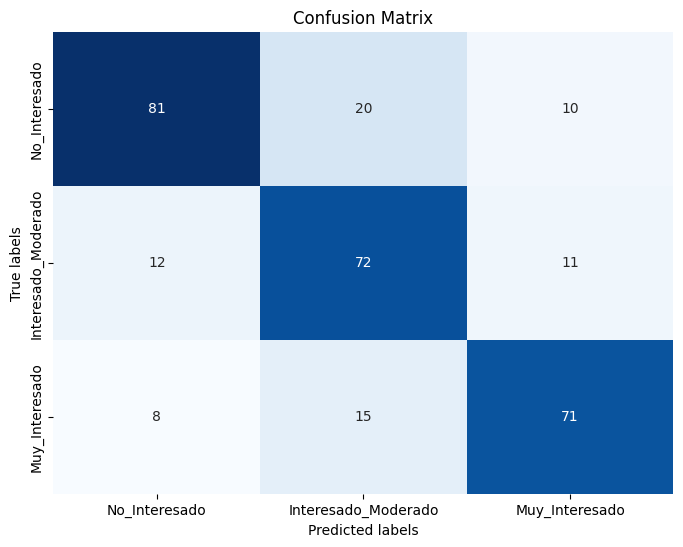

In [22]:
# --- Explicación Académica ---
# Evaluación del Modelo - Visualización de la Matriz de Confusión.
# La matriz de confusión es la herramienta principal para entender
# el rendimiento de un clasificador. Muestra qué clases se están
# prediciendo correctamente y (más importante) qué clases se están
# confundiendo entre sí.

# Define las etiquetas de texto correspondientes a las clases 0, 1 y 2.
labels = ["No_Interesado", "Interesado_Moderado", "Muy_Interesado"]

# Llama a la función que definimos en la celda anterior.
# Pasa las etiquetas verdaderas (y_test) y las predichas por el modelo (y_pred).
conf_matrix = plot_confusion_matrix(y_test, y_pred, labels)

### 3.2.2: Reporte de Clasificación


In [23]:
# --- Explicación Académica ---
# Evaluación del Modelo - Métricas Cuantitativas.
# Se genera el 'classification_report', que proporciona un resumen numérico
# de las métricas clave (Precision, Recall, F1-Score) para cada clase,
# permitiendo un análisis más profundo que el 'accuracy' global.

# Llama a la función 'classification_report' de scikit-learn.
# 'target_names=labels' utiliza las etiquetas de texto para hacer
# el informe más legible.
print(classification_report(y_test, y_pred, target_names=labels))

                     precision    recall  f1-score   support

      No_Interesado       0.80      0.73      0.76       111
Interesado_Moderado       0.67      0.76      0.71        95
     Muy_Interesado       0.77      0.76      0.76        94

           accuracy                           0.75       300
          macro avg       0.75      0.75      0.75       300
       weighted avg       0.75      0.75      0.75       300



## 3.3: Interpretación de las Métricas

### 3.3.1: Interpretación de la Matriz de Confusión

- **No_Interesado**:
  - **Verdaderos Positivos (TP)**: 80 — correctamente clasificados como No_Interesado.
  - **Falsos Negativos (FN)**: 31 (21 + 10) — clasificados erróneamente como Interesado_Moderado o Muy_Interesado.
  - La mayoría de los No_Interesado son identificados correctamente, pero hay errores al confundirlos con otras clases.

- **Interesado_Moderado**:
  - **TP**: 70 — correctamente clasificados como Interesado_Moderado.
  - **FN**: 25 (14 + 11) — clasificados erróneamente como No_Interesado o Muy_Interesado.
  - Se observa que esta clase tiene una precisión menor, con algunos ejemplos que se clasifican incorrectamente como las otras dos clases.

- **Muy_Interesado**:
  - **TP**: 71 — correctamente clasificados como Muy_Interesado.
  - **FN**: 23 (6 + 17) — clasificados erróneamente como No_Interesado o Interesado_Moderado.
  - La mayoría de los Muy_Interesado son correctamente identificados, pero se observa cierta confusión con la clase Interesado_Moderado.



### 3.3.2: Análisis del Reporte de Clasificación

| Clase                 | Precisión | Recall  | F1-Score | Soporte |
|-----------------------|-----------|---------|----------|---------|
| No_Interesado         | 0.80      | 0.72    | 0.76     | 111     |
| Interesado_Moderado   | 0.65      | 0.74    | 0.69     | 95      |
| Muy_Interesado        | 0.77      | 0.76    | 0.76     | 94      |
| **Promedio Macro**    | 0.74      | 0.74    | 0.74     |         |
| **Promedio Ponderado**| 0.74      | 0.74    | 0.74     | 300     |

**Observaciones**:
- **No_Interesado** tiene la **mejor precisión (0.80)**, lo que indica que cuando el modelo predice esta clase, suele ser correcto. Sin embargo, su **recall es 0.72**, lo que significa que hay un 28% de instancias de esta clase que no se detectan correctamente.
- **Interesado_Moderado** tiene la **precisión más baja (0.65)**, lo que indica que el modelo tiene dificultades para clasificar correctamente esta clase, confundiendo algunas instancias con las otras dos.
- **Muy_Interesado** muestra una **buena precisión y recall (0.77 y 0.76)**, lo que significa que el modelo es bastante efectivo al identificar correctamente esta clase y al mismo tiempo logra capturar la mayoría de sus ejemplos.

### 3.3.3: Precisión Global y Promedios
- **Accuracy**: 0.74 (74%)
  - El **accuracy** es la proporción de todas las predicciones correctas en relación con el total de instancias.
  - En este caso, el modelo clasifica correctamente el **74%** de las instancias, lo que indica un rendimiento aceptable.

- **Promedio Macro**:
  - Indica el promedio de precisión, recall y F1-score calculados de manera independiente para cada clase, sin tener en cuenta el tamaño de cada clase.
  - En este caso, todos los valores son **0.74**, lo que sugiere que el rendimiento es bastante equilibrado entre las clases.

- **Promedio Ponderado**:
  - Calcula el promedio ponderado considerando el número de instancias de cada clase, lo que da una medida más precisa del rendimiento global.
  - Los valores son idénticos a los del promedio macro, indicando que las clases tienen tamaños relativamente balanceados.

### 3.3.4: ¿Por Qué el Accuracy es Válido Aquí?
El **accuracy** es una métrica adecuada en este caso porque el **dataset está balanceado**, es decir, el número de ejemplos en cada clase es similar. En escenarios balanceados, el accuracy refleja bien el rendimiento del modelo, ya que no hay ninguna clase que predomine significativamente sobre las demás. En casos desbalanceados, el accuracy podría ser engañoso porque el modelo podría enfocarse en la clase mayoritaria y aún tener un accuracy alto, mientras que las otras clases se clasifican incorrectamente. Aquí, al ser un dataset balanceado, el accuracy de **0.74** es una buena representación del rendimiento general.

### Conclusiones Generales
- El modelo tiene un **rendimiento sólido** en general, con un **accuracy del 74%**.
- **No_Interesado** es la clase que el modelo predice mejor, mientras que **Interesado_Moderado** presenta más dificultades.
- Se podría considerar **ajustar los pesos** para mejorar la precisión de las clases con peor rendimiento o **explorar características adicionales** para mejorar la capacidad del modelo de distinguir entre las tres clases.